In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Leveraged Debt', min_assets=.01, max_expense=1.2)
equities = screen_funds('Equities', 'Leveraged Equity', min_assets=.01, max_expense=1.2)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

4 54
from 2019-05-20 to 2019-07-08 - 58


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

50


,len,mean,std,shrp,drawdown
Symbols,,,,,
RUSL,29,5.378841,3.890108,1.372496,3.627551
BRZU,29,7.507661,8.282683,0.901638,7.626808
LBJ,29,5.183688,5.715231,0.900052,7.729469
EDC,29,3.898554,4.514730,0.854729,6.771041
EET,29,2.588903,2.986181,0.853672,4.599511
GDXX,29,7.513738,9.150199,0.816819,12.050224
UST,29,1.005652,1.186986,0.813800,1.520244
NUGT,29,11.388940,14.163098,0.801326,17.417822
TYD,29,1.425750,1.765343,0.785155,2.271841


evicted URE 0.7286150844616835
evicted UYM 0.7365317147453498
evicted DFEN 0.617339324096133
evicted GDXX 0.570052632439529
evicted LABU 0.4551713023981371
evicted CHAU 0.5435404560460577
evicted USD 0.7756522671590054
retry backlogs ['EDC', 'RXL', 'TQQQ', 'QLD', 'ROM', 'SSO', 'DZK', 'UWM', 'UYG', 'JNUG', 'SPXL', 'XPP', 'UPRO', 'TNA', 'MVV', 'UMDD', 'BIB', 'UDOW', 'URTY', 'PPLC', 'TMF', 'UST', 'MIDU', 'FAS', 'UBT', 'UCC', 'UXI', 'EET', 'SOXL', 'NUGT', 'CURE', 'DDM', 'EURL', 'SAA', 'JPNL', 'LBJ', 'YINN', 'UBIO', 'TECL'] at 0.805 - 1.874
evicted EET 0.6837779522357259
evicted BIB 0.6745944481695333
evicted UCC 0.7523591079185473
evicted NUGT 0.5758559247923215
evicted BRZU 0.5631934558872621
evicted SOXL 0.776801826419928
retry backlogs ['MIDU', 'UYG', 'UPRO', 'YINN', 'FAS', 'TNA', 'EURL', 'MVV', 'DDM', 'SPXL', 'UBIO', 'SSO', 'UBT', 'PPLC', 'QLD', 'URTY', 'XPP', 'EDC', 'UST', 'UWM', 'ROM', 'UXI', 'RXL', 'UDOW', 'UMDD', 'JPNL', 'DZK', 'CURE', 'LBJ', 'SAA', 'TYD', 'JNUG', 'TQQQ', 'TECL'] a

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,2.912457,1.423654,-0.195475,1.934210,2.774270,3.879706,5.951324,2.017888,1.932338
RUSL,29.0,5.378841,3.890108,-0.472713,2.350642,5.551559,8.602391,12.665445,1.372496,3.627551
UBT,29.0,1.809758,2.514482,-2.935063,0.122604,0.978390,2.766528,7.829477,0.703953,3.493592
ROM,29.0,2.169538,5.814658,-9.811634,-1.768155,1.563154,6.262810,17.290104,0.366291,14.117437
FINU,29.0,2.227093,6.180336,-7.429561,-1.786899,2.127655,5.580521,13.759826,0.353931,12.579854


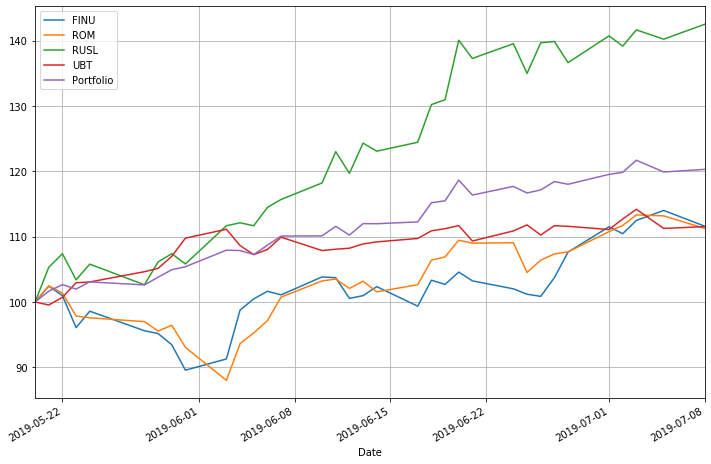

In [8]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.02, backlogs_threshold=.8)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)

{'SPXL': 0.363, 'TMF': 0.637}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,2.525332,1.779291,-1.485956,1.782676,2.683442,3.646305,6.591405,1.396989,2.927639
TMF,29.0,2.650653,3.812269,-4.292014,-0.012116,1.355362,4.091860,11.593556,0.684886,5.014042
SPXL,29.0,2.565358,6.142424,-8.597486,-0.994629,3.661151,5.966096,16.175773,0.411185,12.273395


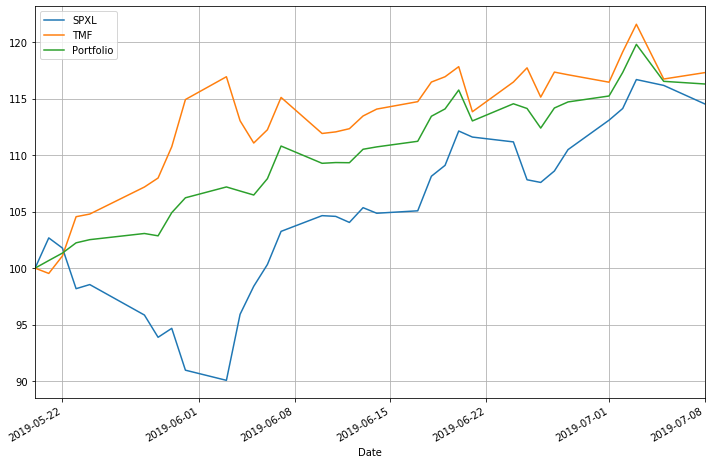

In [9]:
quote2 = Quote(['TMF', 'SPXL'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)

{'SSO': 0.359, 'UBT': 0.641}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,1.727108,1.154102,-0.906200,1.202648,1.852413,2.479245,4.312478,1.462112,1.982569
UBT,29.0,1.809758,2.514482,-2.935063,0.122604,0.978390,2.766528,7.829477,0.703953,3.493592
SSO,29.0,1.696819,4.105382,-5.835048,-0.696121,2.380757,4.062605,10.694173,0.403650,8.359706


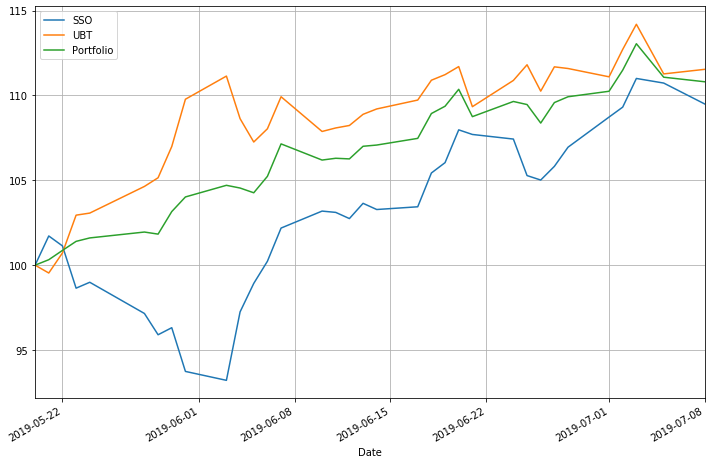

In [11]:
quote2 = Quote(['UBT', 'SSO'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)